About Data Set
==============

# Dependencies and Configurations

## Import Dependencies

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import matplotlib.ticker as ticker
import psycopg2
import os

## Database Configurations

In [2]:
POSTGRESQL_USER = os.getenv('POSTGRESQL_USER') if os.getenv('POSTGRESQL_USER') is not None else 'dockerstudy'
POSTGRESQL_PASSWORD = os.getenv('POSTGRESQL_PASSWORD') if os.getenv('POSTGRESQL_PASSWORD') is not None else 'dockerstudy'
POSTGRESQL_HOST_IP = os.getenv('POSTGRESQL_HOST_IP') if os.getenv('POSTGRESQL_HOST_IP') is not None else 'localhost'
POSTGRESQL_PORT = os.getenv('POSTGRESQL_PORT') if os.getenv('POSTGRESQL_PORT') is not None else '5432'
POSTGRESQL_DATABASE = os.getenv('POSTGRESQL_DATABASE') if os.getenv('POSTGRESQL_DATABASE') is not None else 'dockerstudy'

In [3]:
conn = psycopg2.connect(database=POSTGRESQL_DATABASE, user=POSTGRESQL_USER, password=POSTGRESQL_PASSWORD, host=POSTGRESQL_HOST_IP, port=POSTGRESQL_PORT)
Images = pd.read_sql_query('select * from public.image', con = conn)
Tags = pd.read_sql_query('select * from public.tag', con = conn)
Builds = pd.read_sql_query('select * from public.build', con = conn)
Repositories = pd.read_sql_query('select * from public.repository', con = conn)
Commits = pd.read_sql_query('select * from public.commit', con = conn)
ChangedFiles = pd.read_sql_query('select * from public.changedfile', con = conn)
DockerhubUsers = pd.read_sql_query('select * from public.dockerhubuser', con = conn)
BitbucketUsers = pd.read_sql_query('select * from public.bitbucketuser', con = conn)
GitHubUsers = pd.read_sql_query('select * from public.githubuser', con = conn)
conn.close()

## Facts about Docker Images

In [4]:
print('Number of Docker Images: ', Images.shape[0])

Number of Docker Images:  3364529


In [5]:
print('Number of Docker Images with Linked Source Repositories: ', Images.query("source_repo_source=='CI' or source_repo_source=='NameMatch'").shape[0])

Number of Docker Images with Linked Source Repositories:  440057


In [6]:
print('Number of Docker Images using the CI Automated Builds: ', Images.query("source_repo_source=='CI'").shape[0])
print('In which, ')
print('Number of Docker Images linking to a GitHub repository: ', Images.query("source_repo_source=='CI' and source_repo_location=='GitHub'").shape[0])
print('Number of Docker Images linking to a Bitbucket repository: ', Images.query("source_repo_source=='CI' and source_repo_location=='Bitbucket'").shape[0])

Number of Docker Images using the CI Automated Builds:  375518
In which, 
Number of Docker Images linking to a GitHub repository:  357030
Number of Docker Images linking to a Bitbucket repository:  18488


In [7]:
print('Number of Docker Images that has a repository identified by the name matching method', Images.query("source_repo_source=='NameMatch'").shape[0])
print('In which, ')
print('Number of Docker Images matching to a GitHub repository: ', Images.query("source_repo_source=='NameMatch' and source_repo_location=='GitHub'").shape[0])
print('Number of Docker Images matching to a Bitbucket repository: ', Images.query("source_repo_source=='NameMatch' and source_repo_location=='Bitbucket'").shape[0])

Number of Docker Images that has a repository identified by the name matching method 64539
In which, 
Number of Docker Images matching to a GitHub repository:  63653
Number of Docker Images matching to a Bitbucket repository:  886


In [8]:
conn = psycopg2.connect(database=POSTGRESQL_DATABASE, user=POSTGRESQL_USER, password=POSTGRESQL_PASSWORD, host=POSTGRESQL_HOST_IP, port=POSTGRESQL_PORT)
repo_count = pd.read_sql_query('select count(repo_id) from public.repository', con = conn)
print('Number of Linked Repositories: {}'.format(repo_count['count'][0]))
conn.close()

Number of Linked Repositories: 378615


### Pull count

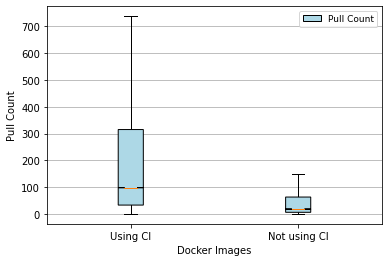

Median of pull count of Docker Images using CI automated builds 98.0
Median of pull count of Docker Images not using CI automated builds 18.0


In [9]:
labels = ['Using CI', 'Not using CI']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
position_list = list(range(0, len(labels)))
bplot = ax.boxplot([Images.query("source_repo_source=='CI'")['pull_count'].dropna().values, Images.query("source_repo_source!='CI'")['pull_count'].dropna().values],
                         notch=True,
                         vert=True,
                         patch_artist=True,
                         showfliers=False,
                         positions=position_list,
                         labels=labels, zorder=10)
for patch in bplot['boxes']:
    patch.set_facecolor('lightblue')
    
ax.yaxis.grid(True)
#ax_legend1 = ax.legend(loc='center left', bbox_to_anchor=(0,0.8),  prop={'size': 9})
ax_legend = ax.legend([bplot["boxes"][0]], ['Pull Count'], loc='upper right', bbox_to_anchor=(1,1),  prop={'size': 9})
#ax.add_artist(ax_legend1)
ax.set_xlabel('Docker Images')
ax.set_ylabel('Pull Count')
plt.show()
fig.tight_layout()
fig.savefig('Image_Pull_Count', dpi=300)
fig.savefig('Image_Pull_Count.pdf')
print('Median of pull count of Docker Images using CI automated builds', np.median(Images.query("source_repo_source=='CI'")['pull_count'].dropna().values))
print('Median of pull count of Docker Images not using CI automated builds', np.median(Images.query("source_repo_source!='CI'")['pull_count'].dropna().values))